In [1]:
from glob import glob

import librosa as lb
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Define Paths

In [2]:
real_audio = glob("../../data/deep-voice/KAGGLE/AUDIO/REAL/*")
fake_audio = glob("../../data/deep-voice/KAGGLE/AUDIO/FAKE/*")

real_audio.sort()
fake_audio.sort()

for i, path in enumerate(real_audio):
    print(i, path.replace("../../data/deep-voice/KAGGLE/AUDIO/REAL/", ""))

print("\n\n")
for i, path in enumerate(fake_audio):
    print(i, path.replace("../../data/deep-voice/KAGGLE/AUDIO/FAKE/", ""))

0 biden-original.wav
1 linus-original.wav
2 margot-original.wav
3 musk-original.wav
4 obama-original.wav
5 ryan-original.wav
6 taylor-original.wav
7 trump-original.wav



0 Obama-to-Biden.wav
1 Obama-to-Trump.wav
2 biden-to-Obama.wav
3 biden-to-Trump.wav
4 biden-to-linus.wav
5 biden-to-margot.wav
6 biden-to-musk.wav
7 biden-to-ryan.wav
8 biden-to-taylor.wav
9 linus-to-biden.wav
10 linus-to-margot.wav
11 linus-to-musk.wav
12 linus-to-obama.wav
13 linus-to-ryan.wav
14 linus-to-taylor.wav
15 linus-to-trump.wav
16 margot-to-biden.wav
17 margot-to-linus.wav
18 margot-to-musk.wav
19 margot-to-obama.wav
20 margot-to-ryan.wav
21 margot-to-taylor.wav
22 margot-to-trump.wav
23 musk-to-biden.wav
24 musk-to-linus.wav
25 musk-to-margot.wav
26 musk-to-obama.wav
27 musk-to-ryan.wav
28 musk-to-taylor.wav
29 musk-to-trump.wav
30 obama-to-linus.wav
31 obama-to-margot.wav
32 obama-to-musk.wav
33 obama-to-ryan.wav
34 obama-to-taylor.wav
35 ryan-to-biden.wav
36 ryan-to-linus.wav
37 ryan-to-margot.wav
38 ry

# Functions to get and plot Spectrograms and Mel Spectrograms
**Spectrogram:** A visual representation of the spectrum of frequencies in a signal as it varies with time, showing how the signal's frequency content changes over time.

**Mel Spectrogram:** A type of spectrogram where the frequencies are scaled according to the mel scale, which aligns more closely with human auditory perception, emphasizing perceptually relevant features.

**STFT (Short-Time Fourier Transform):** A mathematical technique used to analyze the frequency content of a signal as it changes over time. It divides a longer time signal into shorter segments of equal length and applies the Fourier transform to each segment. This provides a two-dimensional representation of the signal, with one dimension representing time and the other representing frequency.

In [3]:
def get_spectrogram(y: np.ndarray) -> (np.ndarray, int):
    '''
    Compute the spectrogram of an audio signal.

    Parameters:
    y (np.ndarray): Audio time series.

    Returns:
    d (np.ndarray): Spectrogram of the audio signal, represented in decibels (dB).
    shape (tuple): Shape of the spectrogram (number of frequency bins, number of time frames).
    '''

    d = lb.stft(y)
    ad = lb.amplitude_to_db(np.abs(d), ref=np.max)

    return ad, ad.shape

def plot_spectrogram(s: np.ndarray, sr: int = 22050, size: tuple=(8, 4), title: str = "Spectrogram of the Audio"):
    '''
    Plot a spectrogram.

    Parameters:
    s (np.ndarray): Spectrogram to plot. This should be a 2D array where the rows correspond to frequency bins and the columns correspond to time frames.
    sr (int, optional): Sampling rate of the audio. Default is 22050 Hz.
    size (tuple, optional): Size of the plot as (width, height). Default is (8, 4).
    title (str, optional): Title of the plot. Default is "Spectrogram of the Audio".
    '''

    plt.figure(figsize=size)
    lb.display.specshow(s, x_axis='time', y_axis='mel', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()


In [4]:
def get_mel_spectrogram(y: np.ndarray, sr: int = 22050, n_mels: int = 128) -> (np.ndarray, int):
    '''
    Compute a Mel spectrogram from an audio signal.

    Parameters:
    y (np.ndarray): Audio time series.
    sr (int): Sampling rate of `y`.
    n_mels (int): Number of Mel bands to generate.

    Returns:
    mel_spectrogram (np.ndarray): 2D array representing the Mel spectrogram.
    shape (tuple): Shape of the Mel spectrogram (number of Mel bands, number of frames).
    '''
    ms = lb.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    m = lb.power_to_db(ms,ref=np.max)

    return m, m.shape

def plot_mel_spectrogram(m: np.ndarray, sr: int = 22050, size: tuple = (8, 4), title: str = "Mel Spectrogram of Audio"):
    '''
    Plot a Mel spectrogram.

    Parameters:
    s (np.ndarray): Mel spectrogram to plot.
    sr (int, optional): Sampling rate of the audio. Default is 22050 Hz.
    size (tuple, optional): Size of the plot as (width, height). Default is (8, 4).
    title (str, optional): Title of the plot. Default is "Mel Spectrogram of Audio".
    '''

    plt.figure(figsize=size)
    lb.display.specshow(m, x_axis='time', y_axis='mel', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

# Real Audio Analysis

In [5]:
a, sr = lb.load(real_audio[1])
print(real_audio[1])

../../data/deep-voice/KAGGLE/AUDIO/REAL/linus-original.wav


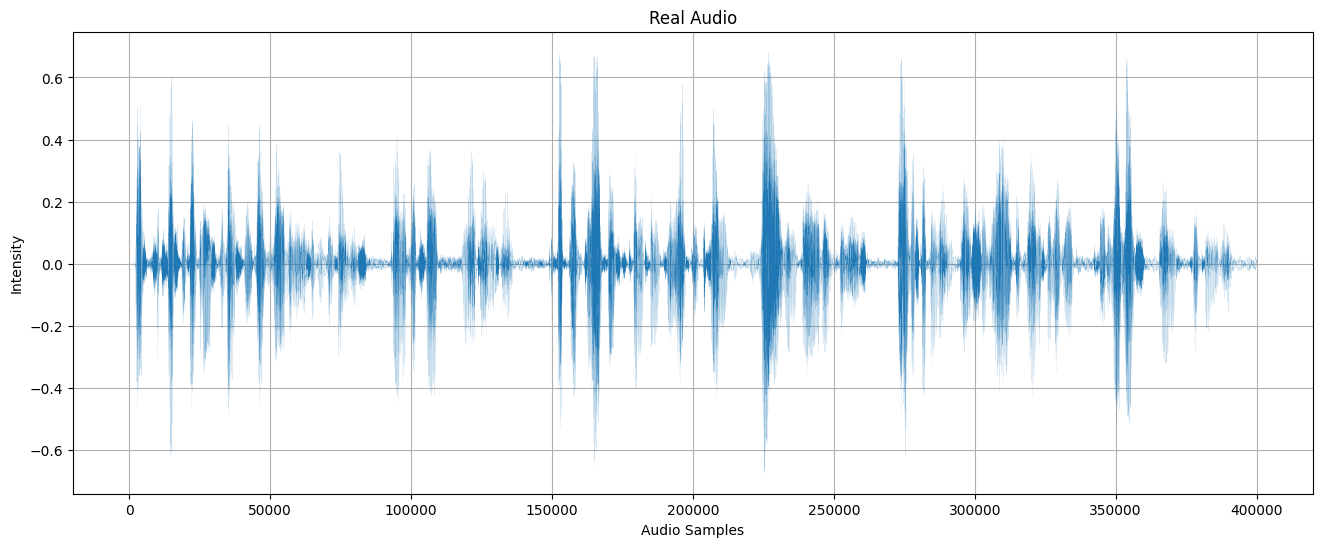

In [6]:
b = a[:400_000]

plt.figure(figsize=(16, 6))
plt.plot(b, lw=0.05)
plt.title("Real Audio")
plt.xlabel("Audio Samples")
plt.ylabel("Intensity")
plt.grid(True)
plt.show()

Dimension of spectrogram: (1025, 782)


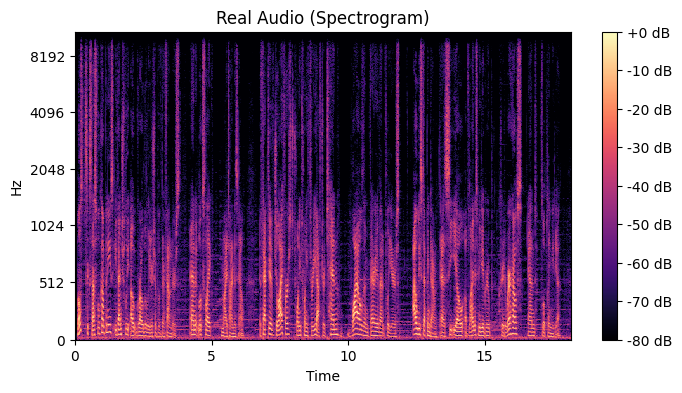

Dimension of mel spectrogram: (512, 782)


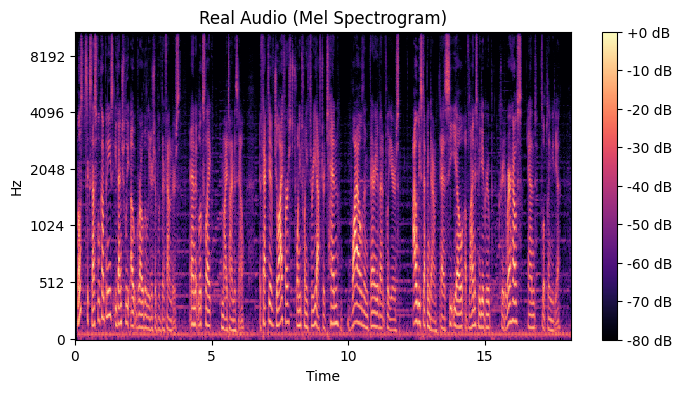

In [7]:
s1, s1_shape = get_spectrogram(y=b)
print(f"Dimension of spectrogram: {s1_shape}")

plot_spectrogram(s1, title="Real Audio (Spectrogram)")

m1, m1_shape = get_mel_spectrogram(y=b, n_mels=512)
print(f"Dimension of mel spectrogram: {m1_shape}")

plot_mel_spectrogram(m1, title="Real Audio (Mel Spectrogram)")

# Fake Audio Analysis

In [8]:
x, sr = lb.load(fake_audio[15])
print(fake_audio[15])

../../data/deep-voice/KAGGLE/AUDIO/FAKE/linus-to-trump.wav


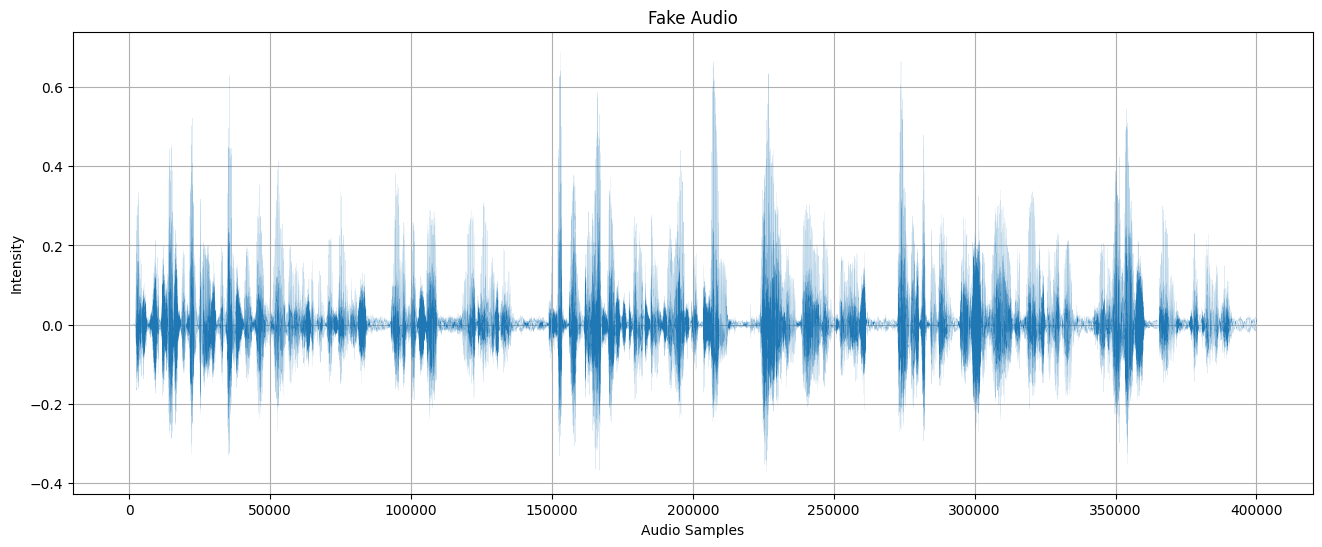

In [9]:
y = x[:400_000]

plt.figure(figsize=(16, 6))
plt.plot(y, lw=0.05)
plt.title("Fake Audio")
plt.xlabel("Audio Samples")
plt.ylabel("Intensity")
plt.grid(True)
plt.show()

Dimension of spectrogram: (1025, 782)


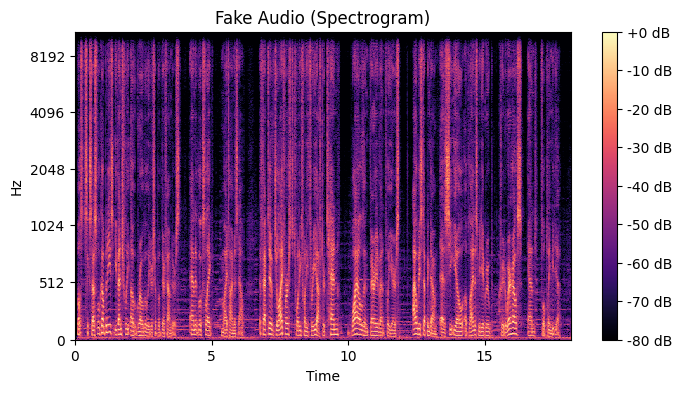

Dimension of mel spectrogram: (256, 782)


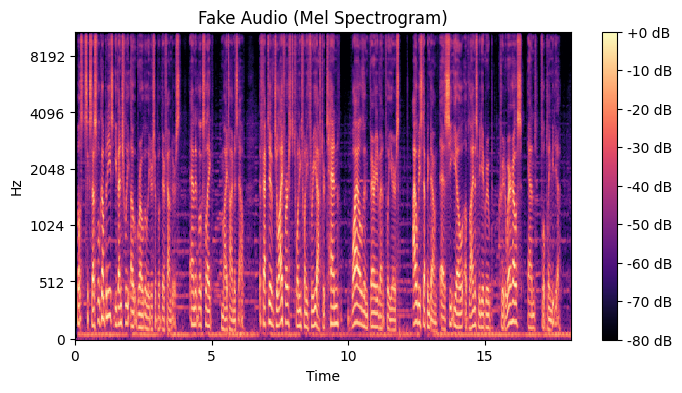

In [10]:
s2, s2_shape = get_spectrogram(y=y)
print(f"Dimension of spectrogram: {s2_shape}")

plot_spectrogram(s2, title="Fake Audio (Spectrogram)")

m2, m2_shape = get_mel_spectrogram(y=y, n_mels=256)
print(f"Dimension of mel spectrogram: {m2_shape}")

plot_mel_spectrogram(m2, title="Fake Audio (Mel Spectrogram)")

**Comparison between Mel Spectrograms of Real and Fake Audio**

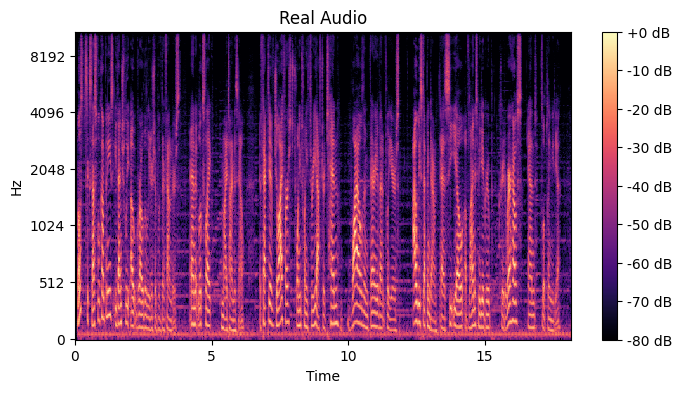

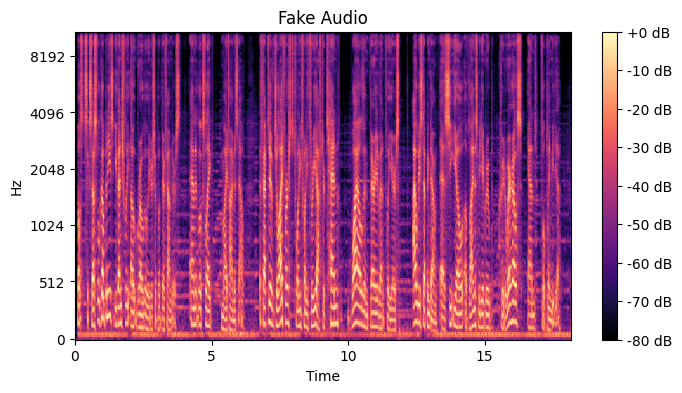

In [11]:
plot_mel_spectrogram(m1, title="Real Audio")
plot_mel_spectrogram(m2, title="Fake Audio")

# Function to create Mel Spectrogram samples (random) from audio

In [12]:
def create_mel_spectrogram_samples(y: np.ndarray, label: str|int, sr: int = 22050, samples: int = 10, sample_time: float = 3, n_mels: int = 128) -> (np.ndarray, np.ndarray):
    '''
    Generate multiple mel spectrogram samples from a single audio signal.

    Parameters:
    y (np.ndarray): The audio signal.
    label (str|int): The label for the samples.
    sr (int): Sampling rate of the audio signal (default is 22050 Hz).
    samples (int): Number of samples to generate (default is 10).
    time (float): Duration of each sample in seconds (default is 3).
    n_mels (int): Number of mel frequency bands (default is 128).

    Returns:
    samples (np.ndarray): Array of mel spectrogram samples.
    labels (np.ndarray): Array of labels containing the labels for the corresponding samples.
    '''

    import random
    import time

    begin = time.time()

    sample_length = int(sr * sample_time)
    s, l = [], []
    for _ in range(samples):
        start = random.randint(0, len(y) - sample_length)
        end = start + sample_length
        m, _ = get_mel_spectrogram(y[start: end], n_mels=n_mels)
        m = np.abs(m)
        m /= 80
        s.append(m)
        l.append([label])

    end = time.time()

    print(f"...Sample created with label = '{label}' with {samples} samples | Dimension of mel spectrograms = {m.shape} | Time taken: {end-begin: .3f}s...")
    return np.array(s), np.array(l)

**Example Usage**

In [13]:
samples_real, label_real = create_mel_spectrogram_samples(y=a, label=1, samples=100, sample_time=1, n_mels=64)
samples_fake, label_fake = create_mel_spectrogram_samples(y=x, label=0, samples=100, sample_time=1, n_mels=64)

...Sample created with label = '1' with 100 samples | Dimension of mel spectrograms = (64, 44) | Time taken:  0.146s...
...Sample created with label = '0' with 100 samples | Dimension of mel spectrograms = (64, 44) | Time taken:  0.143s...


**Creating Training Data**

In [14]:
import random

combined_samples = []
combined_labels = []

for audio in real_audio:
    p, sr = lb.load(audio)
    s, l = create_mel_spectrogram_samples(y=p, label=0, samples=200, sample_time=1.5, n_mels=64)
    combined_samples.append(s)
    combined_labels.append(l)

for audio in random.choices(fake_audio, k=24):
    p, sr = lb.load(audio)
    s, l = create_mel_spectrogram_samples(y=p, label=1, samples=200, sample_time=1.5, n_mels=64)
    combined_samples.append(s)
    combined_labels.append(l)

combined_samples = np.concatenate(combined_samples, axis=0)
combined_labels = np.concatenate(combined_labels, axis=0)

...Sample created with label = '0' with 200 samples | Dimension of mel spectrograms = (64, 65) | Time taken:  0.489s...
...Sample created with label = '0' with 200 samples | Dimension of mel spectrograms = (64, 65) | Time taken:  0.490s...
...Sample created with label = '0' with 200 samples | Dimension of mel spectrograms = (64, 65) | Time taken:  0.491s...
...Sample created with label = '0' with 200 samples | Dimension of mel spectrograms = (64, 65) | Time taken:  0.330s...
...Sample created with label = '0' with 200 samples | Dimension of mel spectrograms = (64, 65) | Time taken:  0.328s...
...Sample created with label = '0' with 200 samples | Dimension of mel spectrograms = (64, 65) | Time taken:  0.329s...
...Sample created with label = '0' with 200 samples | Dimension of mel spectrograms = (64, 65) | Time taken:  0.329s...
...Sample created with label = '0' with 200 samples | Dimension of mel spectrograms = (64, 65) | Time taken:  0.330s...
...Sample created with label = '1' with 

**Splitting**

In [15]:
print(f"Number of total samples: {combined_samples.shape[0]}")
print(f"Shapes of samples data and labels data: {combined_samples.shape} | {combined_labels.shape}\n")

X, X_test, y, y_test = train_test_split(combined_samples, combined_labels, test_size=0.1, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)

print(f"Shapes of train, validation and test data: {X_train.shape} | {X_val.shape} | {X_test.shape}")

Number of total samples: 6400
Shapes of samples data and labels data: (6400, 64, 65) | (6400, 1)

Shapes of train, validation and test data: (4608, 64, 65) | (1152, 64, 65) | (640, 64, 65)


**Convolutional Neural Network model**

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Prepare data
X, X_test, y, y_test = train_test_split(combined_samples, combined_labels, test_size=0.1, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1).to("cuda")
X_val = torch.tensor(X_val, dtype=torch.float32).unsqueeze(1).to("cuda")
X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1).to("cuda")
y_train = torch.tensor(y_train, dtype=torch.float32).to("cuda")
y_val = torch.tensor(y_val, dtype=torch.float32).to("cuda")
y_test = torch.tensor(y_test, dtype=torch.float32).to("cuda")

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

BATCH_SIZE = 64

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# Define the model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.25),

            nn.Conv2d(32, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.25),

            nn.Conv2d(64, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.25)
        )

        self.fc_layers = nn.Sequential(
            nn.Linear(64 * 6 * 6, 256),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv_layers(x)
        x = x.view(-1, 64 * 6 * 6)
        x = self.fc_layers(x)
        return x

model = CNN().to("cuda")
print(model)

# Training the model
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

num_epochs = 50
early_stopping_patience = 10
best_val_accuracy = 0
patience_counter = 0

train_acc, val_acc = [], []
train_loss, val_loss = [], []
train_f1, val_f1 = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        predicted = (outputs > 0.5).float()
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

    train_loss.append(running_loss / len(train_loader))
    train_acc.append(correct / total)

    # Validation
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            running_loss += loss.item()
            predicted = (outputs > 0.5).float()
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

            all_labels.extend(y_batch.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    val_loss.append(running_loss / len(val_loader))
    val_acc.append(correct / total)
    val_f1.append(f1_score(all_labels, all_preds))

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss[-1]:.4f}, Val Loss: {val_loss[-1]:.4f}, '
          f'Accuracy: {train_acc[-1]*100:.2f}%, Val Accuracy: {val_acc[-1]*100:.2f}%')

    if val_acc[-1] > best_val_accuracy:
        best_val_accuracy = val_acc[-1]

        # FIXME: save
        # torch.save(model.state_dict(), 'best_model.pth')
        patience_counter = 0
    else:
        patience_counter += 1

    if patience_counter >= early_stopping_patience:
        print("Early stopping")
        break


CNN(
  (conv_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.25, inplace=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout(p=0.25, inplace=False)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout(p=0.25, inplace=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=2304, out_features=256, bias=True)
    

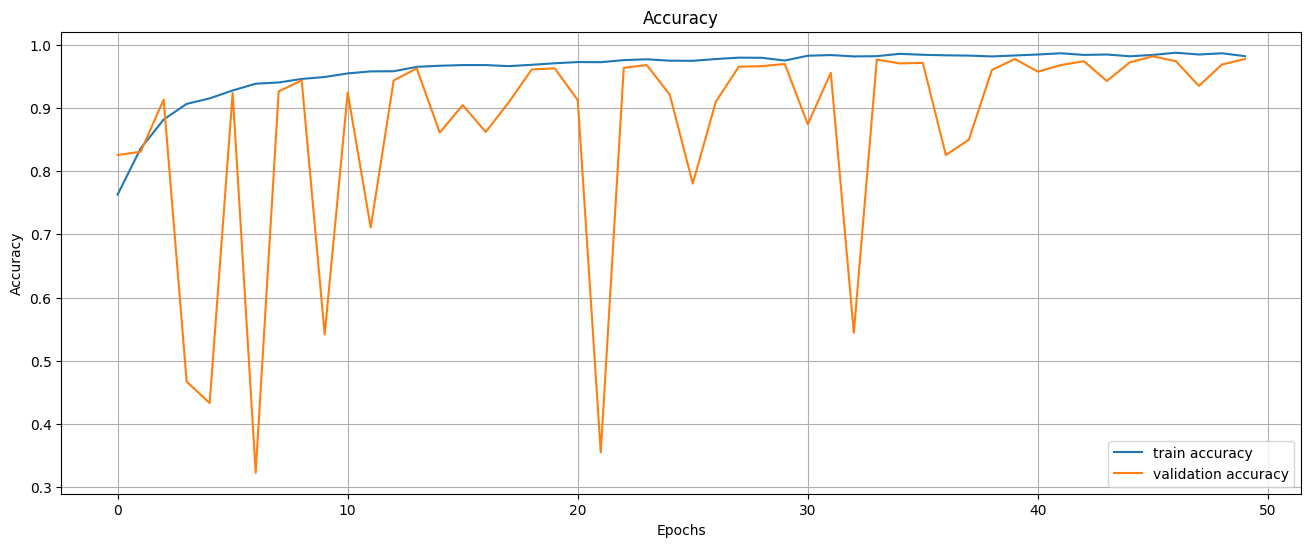

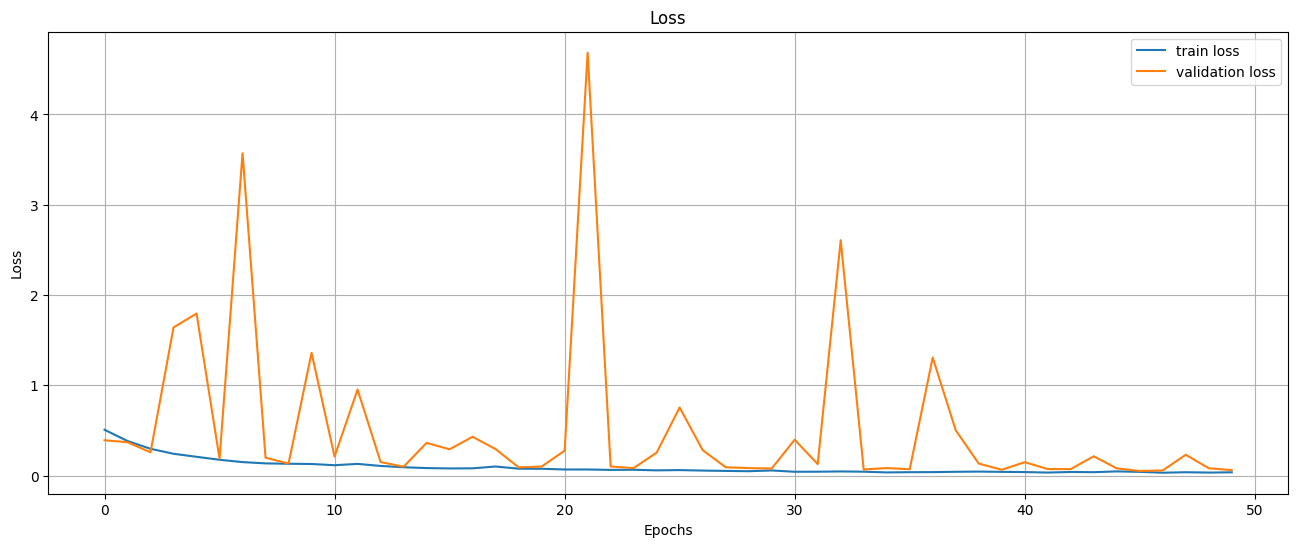

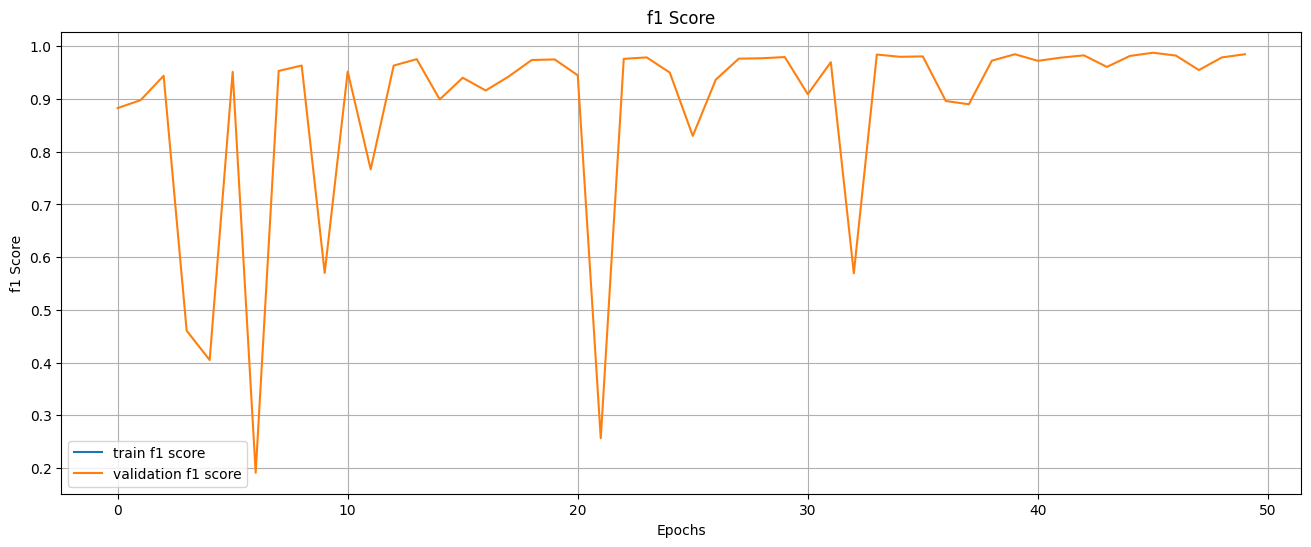

Accuracy: 97.50%


In [21]:
# Load the best model
model.load_state_dict(torch.load('best_model.pth'))

# Plotting
plt.figure(figsize=(16, 6))
plt.plot(train_acc, label="train accuracy")
plt.plot(val_acc, label="validation accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(16, 6))
plt.plot(train_loss, label="train loss")
plt.plot(val_loss, label="validation loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(16, 6))
plt.plot(train_f1, label="train f1 score")
plt.plot(val_f1, label="validation f1 score")
plt.title("f1 Score")
plt.xlabel("Epochs")
plt.ylabel("f1 Score")
plt.legend()
plt.grid(True)
plt.show()

# Testing the model
model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch).squeeze()  # Adjusted to match the y_batch shape
        predicted = (outputs > 0.5).float()
        all_labels.extend(y_batch.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

test_acc = accuracy_score(all_labels, all_preds)
print(f"Accuracy: {test_acc * 100:.2f}%")

# Model Saving
torch.save(model.state_dict(), 'DeepFakeDetector_V1.pth')

**Training of the CNN**

# Testing the Model

**Testing**

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = np.round(model.predict(X_test))
val_acc = accuracy_score(y_pred, y_test)

print(f"Accuracy: {val_acc*100: .2f}%")

**Time Taken in Predictions (Performance Evaluation)**

In [ ]:
%timeit -n 5 -r 2 model.predict(X_val)

**Model Saving**

In [ ]:
model.save("/kaggle/working/DeepFakeDetector_V1.h5") #Size = 7.83 MB (approx.)

# More Approaches

**MFCCs**

Mel-Frequency Cepstral Coefficients (MFCCs) are a set of features used in audio signal processing to represent the characteristics of speech and other audio signals. They are derived from the spectrum of the signal and are based on the human auditory system's response to different frequencies.

In [ ]:
mfcc_1 = lb.feature.mfcc(y=b, sr=sr, n_mfcc=13)

print(mfcc_1.shape)
print(mfcc_1)

**Creating random mfcc samples from audio**

In [ ]:
def create_mfcc_samples(y: np.ndarray, label: str|int, sr: int = 22050, samples: int = 10, sample_time: float = 3, n_mfcc: int = 13) -> (np.ndarray, np.ndarray):
    """
    Create MFCC samples from an audio signal.

    Parameters:
    y (np.ndarray): The input audio signal.
    label (str|int): The label associated with the audio signal.
    sr (int, optional): The sampling rate of the audio signal. Defaults to 22050.
    samples (int, optional): The number of samples to generate. Defaults to 10.
    sample_time (float, optional): The duration (in seconds) of each sample. Defaults to 3.
    n_mfcc (int, optional): The number of MFCCs to extract. Defaults to 13.

    Returns:
    Tuple[np.ndarray, np.ndarray]: A tuple containing:
        - An array of shape (samples, n_mfcc * sample_length) with the MFCC features for each sample.
        - An array of shape (samples, 1) with the corresponding labels.
    """

    import time
    import random

    begin = time.perf_counter()

    sample_length = int(sr * sample_time)
    s, l = [], []

    for _ in range(samples):
        start = random.start = random.randint(0, len(y) - sample_length)
        end = start + sample_length

        mfcc = lb.feature.mfcc(y=y[start:end], sr=sr, n_mfcc=n_mfcc)
        mfcc = mfcc.flatten()

        mfcc = (mfcc - np.mean(mfcc))/np.std(mfcc)

        s.append(mfcc)
        l.append([label])

    end = time.perf_counter()

    print(f"...Sample created with label = '{label}' with {samples} samples | Dimension of mfcc (flattened) = {mfcc.shape} | Time taken: {end-begin: .3f}s...")

    return np.array(s), np.array(l)

In [ ]:
import random

combined_samples = []
combined_labels = []

for audio in real_audio:
    p, sr = lb.load(audio)
    s, l = create_mfcc_samples(y=p, label=0, samples=100, sample_time=3, n_mfcc=13)
    combined_samples.append(s)
    combined_labels.append(l)

for audio in random.choices(fake_audio, k=8):
    p, sr = lb.load(audio)
    s, l = create_mfcc_samples(y=p, label=1, samples=100, sample_time=3, n_mfcc=13)
    combined_samples.append(s)
    combined_labels.append(l)

combined_samples = np.concatenate(combined_samples, axis=0)
combined_labels = np.concatenate(combined_labels, axis=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(combined_samples, combined_labels, test_size=0.2, shuffle=True)

y_train = y_train.flatten()
y_test = y_test.flatten()
print(X_train.shape, X_test.shape)

**Using Support Vector Classifier**

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

svm_model = svm.SVC(kernel='rbf', C=3)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%")

In [ ]:
%timeit -n 5 -r 3 svm_model.predict(X_test)

**Using Random Forest Classifiers**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=400)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

In [ ]:
%timeit -n 10 -r 3 rf_model.predict(X_test)

# Further Prospects

**1) Develop a standard sampler of audio (above ones are random)**

**2) Try more models and ensemble methods**

**3) Optimize Performance as much as possible by decreasing dimensions (Current record: 97% accuracy with CNN & 103 ms/320 samples ~ 0.31 ms/sample**